# Logistic Regression Example

In [1]:
import os, sys, time
import itertools
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score,       \
                            recall_score,          \
                            f1_score,              \
                            confusion_matrix,      \
                            auc,                   \
                            precision_recall_curve 

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read data from file - from local drive or from url
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Another example of Logistic Regression using sklearn and images:
 - https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
    

In [3]:
# convert dataframe to data and target arrays:
# columns ["admit", "gre", "gpa", "rank"]

data = df[["gre", "gpa", "rank"]].values
target = df["admit"].values

print(f"data: -------------------------\n{data}")
print(f"target: -------------------------\n{target}")
print("-"*60)
print("data.shape   =", data.shape)
print("target.shape =", target.shape)

data: -------------------------
[[380.     3.61   3.  ]
 [660.     3.67   3.  ]
 [800.     4.     1.  ]
 ...
 [460.     2.63   2.  ]
 [700.     3.65   2.  ]
 [600.     3.89   3.  ]]
target: -------------------------
[0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1

In [4]:
# split data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)

print("-"*40)
print(x_train[:5])
print(y_train[:5])
print(x_train.shape)
print(y_train.shape)
print("-"*40)
print(x_test[:5])
print(y_test[:5])
print(x_test.shape)
print(y_test.shape)
print("-"*40)

----------------------------------------
[[660.     3.31   4.  ]
 [680.     3.85   3.  ]
 [660.     3.77   3.  ]
 [700.     3.82   3.  ]
 [520.     3.1    4.  ]]
[0 1 0 0 0]
(300, 3)
(300,)
----------------------------------------
[[580.     3.4    2.  ]
 [440.     2.98   3.  ]
 [560.     2.65   3.  ]
 [660.     3.07   3.  ]
 [680.     3.34   2.  ]]
[0 0 1 0 0]
(100, 3)
(100,)
----------------------------------------


In [5]:
# Now time to run the model
model = LogisticRegression(class_weight="balanced", solver='lbfgs')
model.fit(x_train, y_train)

# now let's look how the model predicts

print("-"*40)
print("Performance on training dataset")

expected  = y_train
predicted = model.predict(x_train)
print(metrics.classification_report(expected, predicted))
confusion = metrics.confusion_matrix(expected, predicted)
print(confusion)

print("-"*40)
print("Performance on test dataset")
expected  = y_test
predicted = model.predict(x_test)
print(metrics.classification_report(expected, predicted))
confusion = metrics.confusion_matrix(expected, predicted)
print(confusion)
print("-"*40)

----------------------------------------
Performance on training dataset
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       208
           1       0.43      0.68      0.53        92

    accuracy                           0.63       300
   macro avg       0.62      0.64      0.61       300
weighted avg       0.70      0.63      0.64       300

[[125  83]
 [ 29  63]]
----------------------------------------
Performance on test dataset
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        65
           1       0.48      0.63      0.54        35

    accuracy                           0.63       100
   macro avg       0.62      0.63      0.62       100
weighted avg       0.66      0.63      0.64       100

[[41 24]
 [13 22]]
----------------------------------------


In [6]:
def show_roc_curve(target=None, predict_proba=None):
    """
    # ROC curve = (Receiver Operating Characteristic curve)
    # was first developed during World War II for detecting enemy objects in battlefields.
    # plotting True Positive Rate (TPR) vs False Positive Rate (FPR) at various thresholds.
    # TPR a.k.a. sensitivity, recall, or probability of detection.
    # FPR a.k.a fall-out or probability of false alarm = (1-specificity).
    # So ROC curve is the sensitivity as a function of fall-out.
    """
    fpr, tpr, thresholds = metrics.roc_curve(target, predict_proba[:,1])
    plt.plot(fpr, tpr, linewidth=3.0, color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

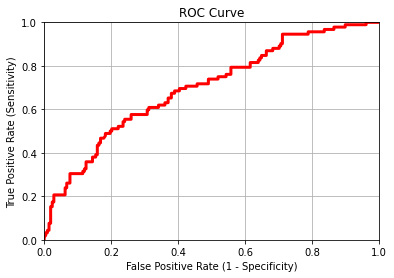

In [7]:
predict_proba = model.predict_proba(x_train)
# predict_proba
show_roc_curve(target=y_train, predict_proba=predict_proba)

In [8]:
#Now add AUC (Area Under Curve) under the curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, predict_proba[:,1])
print("AUC = %.4f" % float(metrics.auc(fpr, tpr)))

AUC = 0.6994


In [9]:
def plot_confusion_matrix(cm, title, 
                          classes=['abnormal', 'normal'],
                          cmap=plt.cm.Blues, 
                          save_as=""):
    """
    # print Confusion matrix with blue gradient colours
    #   usage:
    #     cm = metrics.confusion_matrix(expected, predicted)
    #     plot_confusion_matrix(cm)
    #     plot_confusion_matrix(cm, title="Some Title", saveas="cm.png")
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if len(save_as) >0 :
        plt.savefig(save_as, dpi=100)

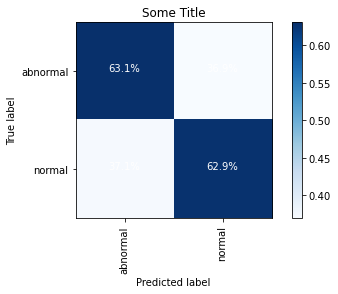

In [10]:
cm = metrics.confusion_matrix(expected, predicted)
plot_confusion_matrix(cm, title="Some Title")

In [11]:
type(cm)

numpy.ndarray

<br>----------------------------------------------------------------------------
<h3>Using Cross-Validation Folds</h3>
<p>We randomly split all data rows in 4 groups (folds) numbered as 0,1,2,3
<br>For modeling we will randomly select one of the folds as test data, 
<br>and combination of other three folds as training data.
<br>Thus we can repeat modeling 4 times (if there are 4 folds).
<br>Below we do that. We also repeat everything 3 times.
<br>So we make 12 calculations, and then calculate mean and standard deviation.</p>

In [12]:
n_cv = 4           # number of cross-validation folds
df_len = len(df)   # length of data

# randomly populate column cv_fold with numbers 0,1,2,3
df['cv_fold'] = np.random.randint(0,4, df_len)  
print("values in column 'cv_fold':", np.unique(df['cv_fold']))

print("check that classes (0 or 1) are approx evenly distributed")
print("between folds: (0+1+2+3)/4 = 1.5")
print ("0 => %.4f" % np.mean(df.cv_fold[df.admit == 0]))
print ("1 => %.4f" % np.mean(df.cv_fold[df.admit == 1]))

values in column 'cv_fold': [0 1 2 3]
check that classes (0 or 1) are approx evenly distributed
between folds: (0+1+2+3)/4 = 1.5
0 => 1.3407
1 => 1.5512


In [13]:
def run_cv(model, label, columns, repeat = 1):
    """
    #  runs model
    #  gets data from external DataFrame df:
    #      X => df[columns]
    #      Y => df['admit']
    #  goess through n_cv folds
    #  repeats "repeat" times
    #  (12 calculations, if n_cv=4, and repeat=3)
    #  returns dictionary "res" 
    #      keys   [precision, recall, f1core]
    #      values as tuples (mean, std_deviation)
    """   
    print("running ", label)
    t1=time.time()
    precisions = []
    recalls = []
    f1scores = []
    n_cv = len(df.cv_fold.unique())

    for cycle in range(repeat):
        # ----------------------------
        for n in range(n_cv):
            print("(rep=%d, fold=%d), " % (cycle,n), end='')
            X_train = df[df.cv_fold != n][columns]
            Y_train = df[df.cv_fold != n]['admit']
            X_test = df[df.cv_fold == n][columns]
            Y_test = df[df.cv_fold == n]['admit']
            model.fit(X_train, Y_train)

            Y_predict = model.predict(X_test)
            recalls.append    (recall_score   (Y_test, Y_predict))
            precisions.append (precision_score(Y_test, Y_predict))
            f1scores.append   (f1_score       (Y_test, Y_predict))
        print()
        # ----------------------------

    res = {}
    res['precision'] = (np.mean(precisions), np.std(precisions))
    res['recall']    = (np.mean(recalls), np.std(recalls))
    res['f1score']   = (np.mean(f1scores),np.std(f1scores))

    print("\nfinished %d calculations" % (repeat*n_cv))
    print ("Precision : %.6f +- %.6f" % (np.mean(precisions) , np.std(precisions)))
    print ("Recall    : %.6f +- %.6f" % (np.mean(recalls)    , np.std(recalls)))
    print ("F1 score  : %.6f +- %.6f" % (np.mean(f1scores)   , np.std(f1scores)))
    print("Elapsed %.2f sec" % (time.time()-t1) )
    print('-'*65,"\n")
    return res

In [14]:
mymodel = LogisticRegression(class_weight="balanced", solver='lbfgs')
res = run_cv(mymodel, 'Some Title', columns=["gre", "gpa", "rank"], repeat = 3)

running  Some Title
(rep=0, fold=0), (rep=0, fold=1), (rep=0, fold=2), (rep=0, fold=3), 
(rep=1, fold=0), (rep=1, fold=1), (rep=1, fold=2), (rep=1, fold=3), 
(rep=2, fold=0), (rep=2, fold=1), (rep=2, fold=2), (rep=2, fold=3), 

finished 12 calculations
Precision : 0.444501 +- 0.054081
Recall    : 0.662897 +- 0.036887
F1 score  : 0.528465 +- 0.029051
Elapsed 0.13 sec
----------------------------------------------------------------- 



In [15]:
for kk in res.keys():
        (v1,v2) = res[kk]
        v1 = round(v1,3)
        v2 = round(v2,3)
        res[kk] = (v1,v2)
        print("%10s  %.3f +/- %.3f" % (kk,v1,v2))


 precision  0.445 +/- 0.054
    recall  0.663 +/- 0.037
   f1score  0.528 +/- 0.029


In [16]:
mymodel.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
mymodel.coef_

array([[ 0.00238248,  0.82482975, -0.51278972]])